In [770]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from scipy.spatial import distance

In [771]:
def show(X, y):
    df = pd.DataFrame(X, columns=["x", "y"])
    plot = sns.jointplot(data=df, x="x", y="y", hue=y, palette={
        0 : '#b00000',
        1 : '#00b000',
        2 : '#0000b0'})

In [772]:
def rotation_matrix(theta):
    theta = np.radians(-theta)
    c, s = np.cos(theta), np.sin(theta)
    return np.array(((c, -s), (s, c)))

In [773]:
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, random_state=150)

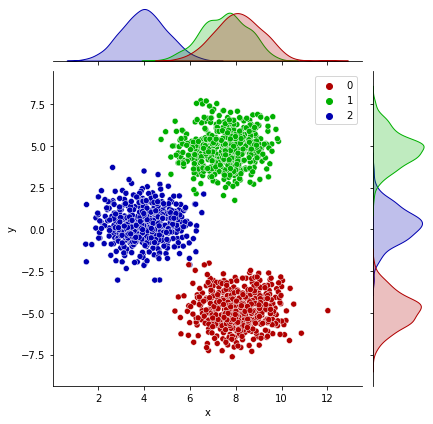

In [774]:
show(X, y)

In [775]:
D = np.array([[5, 0], [0, 0.8]])

In [776]:
X = X.dot(D)

In [777]:
rot = rotation_matrix(30)

In [778]:
rot

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

In [779]:
X = X.dot(rot)

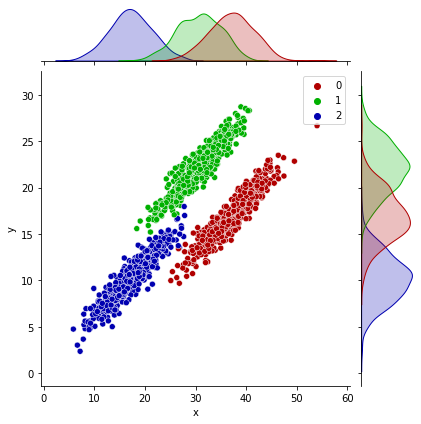

In [780]:
show(X, y)

In [781]:
y_pred = KMeans(n_clusters=3).fit_predict(X)

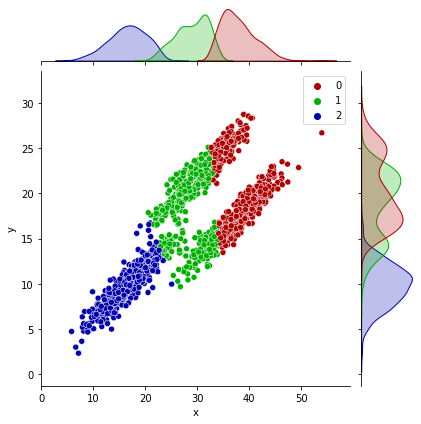

In [782]:
show(X, y_pred)

In [783]:
rbf_param = 1.5
K = np.exp(-rbf_param * distance.cdist(X, X, metric='sqeuclidean'))

In [784]:
D = K.sum(axis=1)

In [785]:
D = np.sqrt(1/D)

In [786]:
M = np.multiply(D[np.newaxis, :], np.multiply(K, D[:, np.newaxis]))

In [787]:
U, _, _ = np.linalg.svd(M, full_matrices=False)

In [788]:
U = U[:, 0:5]

In [789]:
U = normalize(U)

In [790]:
y_pred = KMeans(n_clusters=3).fit_predict(U)

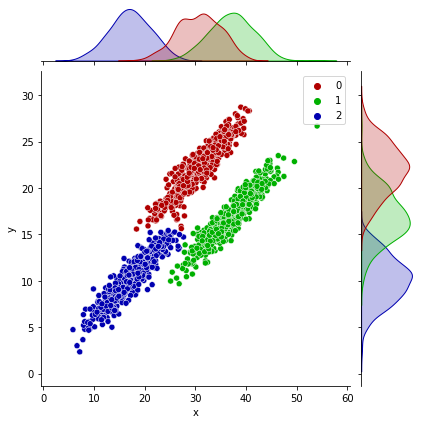

In [791]:
show(X, y_pred)